In [2]:
#import thư viện
import numpy as np
from tensorflow import keras
from keras.layers import Activation
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import pickle

In [41]:
pickle_in = open("x.pickle","rb")
x = pickle.load(pickle_in)

In [42]:
pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [43]:
print(x.shape)
print(y.shape)

(91, 100, 100)
(91,)


In [44]:
y = keras.utils.to_categorical(y, 3)
y.shape

(91, 3)

In [45]:
x=x.reshape(x.shape[0],100,100,1)
x.shape

(91, 100, 100, 1)

In [46]:
batch_size = 128
num_classes = 3
input_shape = (100, 100, 1)
epochs = 10
model =Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same', input_shape=(100,100,1)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
#model.add(MaxPooling2D((2,2)))


model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
#model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(2,2),activation='relu',kernel_initializer='he_uniform',padding='same'))
#model.add(Conv2D(128,(2,2),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))


model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 100, 100, 32)      320       
                                                                 
 conv2d_33 (Conv2D)          (None, 100, 100, 32)      9248      
                                                                 
 conv2d_34 (Conv2D)          (None, 100, 100, 64)      18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 50, 50, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 50, 50, 128)       32896     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 25, 25, 128)      0         
 g2D)                                                

In [47]:
x.shape

(91, 100, 100, 1)

In [48]:
from keras.backend import categorical_crossentropy
from tensorflow.keras.optimizers import SGD,Adam
#opt=SGD(lr=0.01,momentum=0.9)
opt =Adam()
model.compile(optimizer=opt,loss = 'categorical_crossentropy',metrics = ['accuracy'])
history = model.fit(x,y,epochs=10,batch_size =64,validation_split=(0.1),verbose=1)

Epoch 1/10
2/2 [==============================] - 6s 2s/step - loss: 4927.9712 - accuracy: 0.4074 - val_loss: 17963.8164 - val_accuracy: 0.6000
Epoch 2/10
2/2 [==============================] - 6s 1s/step - loss: 27732.0586 - accuracy: 0.3086 - val_loss: 4442.4858 - val_accuracy: 0.2000
Epoch 3/10
2/2 [==============================] - 6s 1s/step - loss: 5479.3374 - accuracy: 0.3457 - val_loss: 519.7104 - val_accuracy: 0.6000
Epoch 4/10
2/2 [==============================] - 6s 1s/step - loss: 866.3758 - accuracy: 0.3951 - val_loss: 458.7701 - val_accuracy: 0.2000
Epoch 5/10
2/2 [==============================] - 6s 2s/step - loss: 237.6406 - accuracy: 0.4568 - val_loss: 263.4633 - val_accuracy: 0.6000
Epoch 6/10
2/2 [==============================] - 6s 1s/step - loss: 237.6109 - accuracy: 0.7284 - val_loss: 92.2301 - val_accuracy: 0.8000
Epoch 7/10
2/2 [==============================] - 6s 1s/step - loss: 133.1111 - accuracy: 0.7407 - val_loss: 144.3989 - val_accuracy: 0.6000
Epoch 8

In [49]:
model.save('teamkhoa.h5')

In [1]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array 
from keras.models import load_model
import numpy as np  
import matplotlib.pyplot as plt
import cv2 

# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(100, 100))	
	
	return img

[[0. 0. 1.]]
expectation Khoa


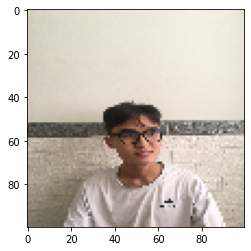

In [2]:
labels = {0: 'Cường',
          1: 'Huy',    
          2: 'Khoa'
          }
model = load_model('teamkhoa.h5')
	# load model
img = load_image('khoa.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)]) 

[[1. 0. 0.]]
expectation Cường


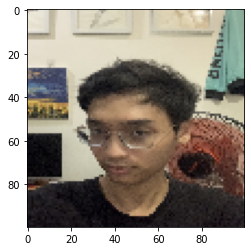

In [3]:
labels = {0: 'Cường',
          1: 'Huy',    
          2: 'Khoa'
          }
model = load_model('teamkhoa.h5')
	# load model
img = load_image('a3a1a5bc6f3aae64f72b.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)]) 